In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

import sys

sys.path.append('../../helper_classes')
from limit_utils import get_sensitivity_bands

2025-06-30 01:17:13.102599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751271433.118888  437235 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751271433.123927  437235 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751271433.139198  437235 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751271433.139211  437235 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751271433.139213  437235 computation_placer.cc:177] computation placer alr

In [2]:
def get_signal_rates_from_likelihood(likelihood_file):
    sys.path.append('..')
    likelihood_class = __import__('create_simple_template_likelihood', globals(), locals(), [])
    class_names = [name for name in dir(likelihood_class) if isinstance(getattr(likelihood_class, name), type)]
    globals().update({name: getattr(likelihood_class, name) for name in class_names})
    
    likelihood_container = pkl.load(open(likelihood_file, 'rb'))
    signal_expected_mean = likelihood_container.expected_signal_counts
    
    return signal_expected_mean

In [3]:
def scaling_fn(mu, mu_ref):
    return mu / mu_ref

In [4]:
def get_bands(site='LNGS', exposure='600ty'):
    signal_expected_mean = get_signal_rates_from_likelihood(f'likelihoods/EFT_O6_s_WIMP_60t_{exposure}_{site}.pkl')

    masses, bands = get_sensitivity_bands(directory=f'outputs/EFT_O6_s_WIMP_60t_{exposure}_{site}',
                                          scaling_fn=scaling_fn,
                                          signal_name='WIMP',
                                          signal_expected_mean=signal_expected_mean,
                                          inference_config=f'inference_configs/default_{site}.ini')

    return masses, bands

In [5]:
all_bands = {'LNGS': dict(), 'SURF': dict()}
all_exposures = ['100ty', '300ty', '600ty', '1000ty']

for exposure in all_exposures:
    masses, bands_LNGS = get_bands(site='LNGS', exposure=exposure)
    all_bands['LNGS'][exposure] = bands_LNGS

    masses, bands_SURF = get_bands(site='SURF', exposure=exposure)
    all_bands['SURF'][exposure] = bands_SURF

Found 3 failed toy for WIMP30; removing...
Found 14 failed toy for WIMP40; removing...
Found 12 failed toy for WIMP50; removing...
Found 3 failed toy for WIMP30; removing...
Found 22 failed toy for WIMP40; removing...
Found 22 failed toy for WIMP50; removing...
Found 1 failed toy for WIMP14; removing...
Found 1 failed toy for WIMP17; removing...
Found 7 failed toy for WIMP21; removing...
Found 40 failed toy for WIMP30; removing...
Found 106 failed toy for WIMP40; removing...
Found 98 failed toy for WIMP50; removing...
Found 2 failed toy for WIMP17; removing...
Found 4 failed toy for WIMP21; removing...
Found 51 failed toy for WIMP30; removing...
Found 106 failed toy for WIMP40; removing...
Found 99 failed toy for WIMP50; removing...
Found 12 failed toy for WIMP10; removing...
Found 8 failed toy for WIMP12; removing...
Found 7 failed toy for WIMP14; removing...
Found 16 failed toy for WIMP17; removing...
Found 29 failed toy for WIMP21; removing...
Found 94 failed toy for WIMP30; removin

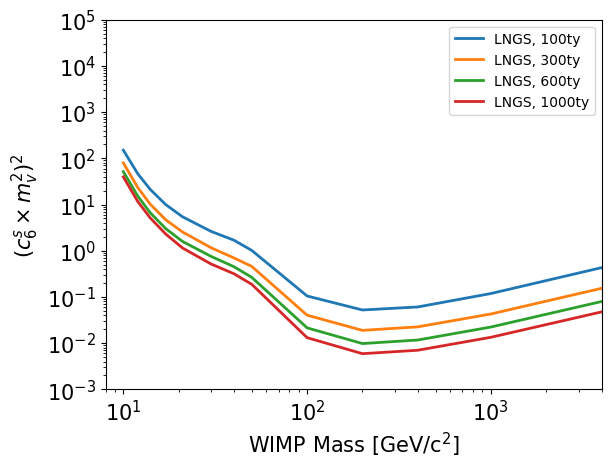

In [6]:
fig = plt.figure()
ax = fig.gca()

for exposure in all_exposures:
    these_bands = all_bands['LNGS'][exposure]

    plt.plot(masses, these_bands[0], lw=2., label=f'LNGS, {exposure}')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

xlab = r'WIMP Mass [GeV/c$^2$]'
xlim = (8, 4000)

ylab = r'$(c_6^s \times m^2_v)^2$'
ylim = (1e-3, 1e5)

ax.set_xlabel(xlab, fontsize=15)
ax.set_xlim(xlim)

ax.set_ylabel(ylab, fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')
ax.set_xscale('log')

plt.legend()

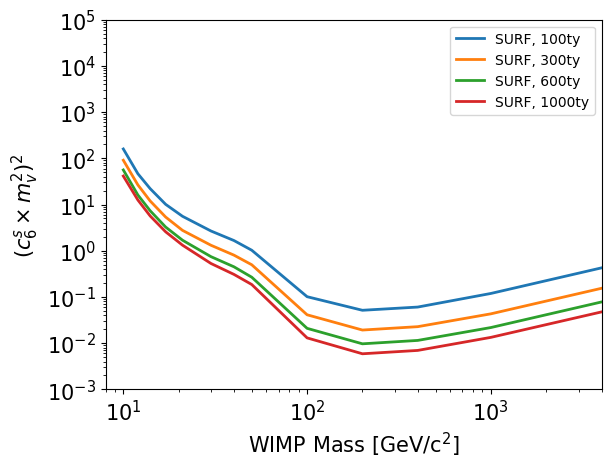

In [7]:
fig = plt.figure()
ax = fig.gca()

for exposure in all_exposures:
    these_bands = all_bands['SURF'][exposure]

    plt.plot(masses, these_bands[0], lw=2., label=f'SURF, {exposure}')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

xlab = r'WIMP Mass [GeV/c$^2$]'
xlim = (8, 4000)

ylab = r'$(c_6^s \times m^2_v)^2$'
ylim = (1e-3, 1e5)

ax.set_xlabel(xlab, fontsize=15)
ax.set_xlim(xlim)

ax.set_ylabel(ylab, fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')
ax.set_xscale('log')

plt.legend()